In [1]:
# coding:utf-8

import pandas as pd
import numpy as np
import os,sys
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [74]:
dtest = pd.read_csv('../datas/dtest')
dtest.head()

,is_risk,rowkey,y
0,-1,139661,0.935701
1,-1,101345,0.902318
2,-1,101360,0.890418
3,-1,52581,0.878109
4,-1,175932,0.872764


In [75]:
dtest.head(20)

,is_risk,rowkey,y
0,-1,139661,0.935701
1,-1,101345,0.902318
2,-1,101360,0.890418
3,-1,52581,0.878109
4,-1,175932,0.872764
5,-1,93223,0.857576
6,-1,139680,0.857538
7,-1,176073,0.856726
8,-1,79369,0.849744
9,-1,10058,0.842447


In [68]:
dtest.head(20)

,is_risk,rowkey,y
0,-1,139662,0.885064
1,-1,139661,0.885064
2,-1,140636,0.882041
3,-1,116137,0.851196
4,-1,79372,0.839226
5,-1,101345,0.836050
6,-1,101370,0.836050
7,-1,101360,0.836050
8,-1,165543,0.832278
9,-1,95042,0.824039


In [69]:
dtest['is_risk'] = dtest['y'].map(lambda x: 0 if x<=0.733221 else 1)
dtest.head()

,is_risk,rowkey,y
0,1,139662,0.885064
1,1,139661,0.885064
2,1,140636,0.882041
3,1,116137,0.851196
4,1,79372,0.839226


In [70]:
dtest = dtest.sort_values('rowkey')
dtest.head()

,is_risk,rowkey,y
11369,0,24,0.01679
15422,0,37,0.01243
14214,0,45,0.01243
14215,0,46,0.01243
8484,0,48,0.02230


In [71]:
dtest[['rowkey','is_risk']].to_csv('../datas/sub1.csv',index=None,header=None)

In [73]:
dtest = dtest.sort_values('y',ascending=False)
dtest.head(20)

,is_risk,rowkey,y
1,1,139661,0.885064
0,1,139662,0.885064
2,1,140636,0.882041
3,1,116137,0.851196
4,1,79372,0.839226
6,1,101370,0.836050
5,1,101345,0.836050
7,1,101360,0.836050
8,1,165543,0.832278
9,1,95042,0.824039


In [64]:
dtest.head(20)

,is_risk,rowkey,y
0,1,159135,0.949036
1,1,139680,0.914782
2,1,158690,0.900634
3,1,139662,0.899134
4,1,139661,0.899134
5,1,79369,0.876259
6,1,116137,0.869364
7,1,91232,0.868656
8,1,91216,0.868656
9,1,3095,0.844644


In [ ]:
dtest[['']]

In [51]:
xtest = pd.read_csv('../datas/xtest')
xtest.head()

,is_risk,rowkey,y
0,1,755883,0.921757
1,1,759124,0.914997
2,1,846104,0.868676
3,1,846156,0.868676
4,1,784980,0.867284


In [47]:
xh = xtest.head()

In [50]:
dict(xh['is_risk'].value_counts())

{0: 1, 1: 4}

In [46]:
xtest.loc[:0]

,is_risk,rowkey,y,s,recall,precision,f
0,1,946196,0.843248,1.0,0.004926,1.0,0.333333


In [44]:
#xtest.sort_values('y', ascending=False)

In [42]:
#xtest.index.tolist()

In [21]:
xtest.shape

(19499, 3)

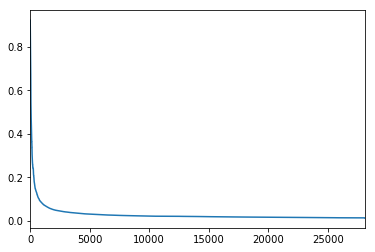

In [52]:
xtest.y.plot()
plt.show()

In [23]:
xs = xtest[xtest['is_risk']==1].shape[0]
xs

203

In [53]:
s = [xtest.loc[0].is_risk]
n =1
prec = [xtest.loc[0].is_risk/n]
for i in xtest.index[1:]:
    n += 1
    s.append(xtest.loc[i].is_risk + s[-1])
    prec.append(1.0*s[-1]/n)
print s

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 15.0, 15.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 19.0, 20.0, 21.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 26.0, 26.0, 27.0, 28.0, 28.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 32.0, 33.0, 33.0, 34.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 48.0, 48.0, 49.0, 50.0, 51.0, 51.0, 52.0, 52.0, 53.0, 54.0, 55.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 57.0, 58.0, 59.0, 60.0, 60.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.0, 63.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 72.0, 72.0, 72.0, 72.0, 72.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 

In [54]:
xtest['s'] = s
xtest['recall'] = 1.0*xtest['s']/xs
xtest['precision'] = prec
xtest['f'] =(1+0.1*0.1)*xtest['precision']*xtest['recall']/(0.1*0.1*xtest['precision']+xtest['recall'])
xtest.head()

,is_risk,rowkey,y,s,recall,precision,f
0,1,755883,0.921757,1.0,0.004926,1.0,0.333333
1,1,759124,0.914997,2.0,0.009852,1.0,0.501241
2,1,846104,0.868676,3.0,0.014778,1.0,0.602386
3,1,846156,0.868676,4.0,0.019704,1.0,0.669983
4,1,784980,0.867284,5.0,0.024631,1.0,0.718350


In [55]:
xtest.head(20)

,is_risk,rowkey,y,s,recall,precision,f
0,1,755883,0.921757,1.0,0.004926,1.000000,0.333333
1,1,759124,0.914997,2.0,0.009852,1.000000,0.501241
2,1,846104,0.868676,3.0,0.014778,1.000000,0.602386
3,1,846156,0.868676,4.0,0.019704,1.000000,0.669983
4,1,784980,0.867284,5.0,0.024631,1.000000,0.718350
5,1,784916,0.867284,6.0,0.029557,1.000000,0.754670
6,1,784864,0.867284,7.0,0.034483,1.000000,0.782946
7,1,785025,0.867284,8.0,0.039409,1.000000,0.805583
8,1,785010,0.867284,9.0,0.044335,1.000000,0.824116
9,1,757002,0.867066,10.0,0.049261,1.000000,0.839568


In [ ]:
dtest[dtest['']]

In [38]:
xtest.f.max()

0.66998341625207292

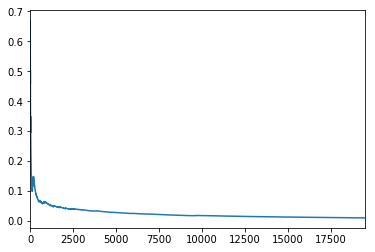

In [39]:
xtest.f.plot()
plt.show()

In [18]:
xtest.shape

(113220, 5)

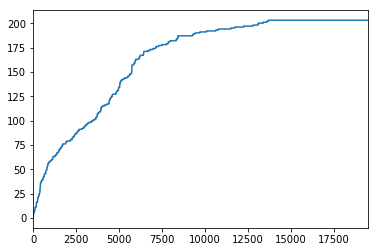

In [26]:
xtest.s.plot()
plt.show()

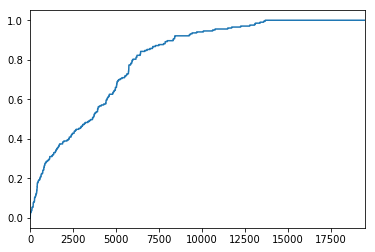

In [27]:
xtest.srate.plot()
plt.show()